In [1]:
import sys
sys.path.append("../")
sys.path.append("../lib/")

sys.path

['C:\\Program Files (x86)\\Microsoft Visual Studio\\Shared\\Python36_64\\python36.zip',
 'C:\\Program Files (x86)\\Microsoft Visual Studio\\Shared\\Python36_64\\DLLs',
 'C:\\Program Files (x86)\\Microsoft Visual Studio\\Shared\\Python36_64\\lib',
 'C:\\Program Files (x86)\\Microsoft Visual Studio\\Shared\\Python36_64',
 '',
 'C:\\Users\\Previato\\AppData\\Roaming\\Python\\Python36\\site-packages',
 'C:\\Users\\Previato\\AppData\\Roaming\\Python\\Python36\\site-packages\\win32',
 'C:\\Users\\Previato\\AppData\\Roaming\\Python\\Python36\\site-packages\\win32\\lib',
 'C:\\Users\\Previato\\AppData\\Roaming\\Python\\Python36\\site-packages\\Pythonwin',
 'C:\\Program Files (x86)\\Microsoft Visual Studio\\Shared\\Python36_64\\lib\\site-packages',
 'C:\\Users\\Previato\\AppData\\Roaming\\Python\\Python36\\site-packages\\IPython\\extensions',
 'C:\\Users\\Previato\\.ipython',
 '../',
 '../lib/']

In [2]:
import src.enviroment2 as enviroment
import src.pacman_problem as pacman
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors

#from ghost_avoidance_heuristic import GhostAvoidanceHeuristic
# Needed to hide warnings in the matplotlib sections
import warnings
import numpy as np
import pandas as pd
import time
import yaml
warnings.filterwarnings("ignore")

In [3]:
maze_arqs = {'Mazes/TinyMaze01.txt':[30,28],
             'Mazes/SmallMaze01.txt':[30,84],
             'Mazes/SmallMaze02.txt':[30,56],
             'Mazes/MediumMaze01.txt':[60,56],
             'Mazes/MediumMaze02.txt':[60,112],
             'Mazes/BigMaze01.txt':[60,140],
             'Mazes/BigMaze02.txt':[90,140]}

In [4]:
algs = {
    'BFS': lambda p: pacman.breadth_first_graph_search(p),
    'DFS': lambda p: pacman.depth_first_graph_search(p),
    'Greedy Manhattan': lambda p: pacman.greedy_best_first_search(p),
    'Greedy Euclidean': lambda p: pacman.greedy_best_first_search(p, p.h_euclidean),
    'Greedy Euclidean avoidance': lambda p: pacman.greedy_best_first_search(p, p.h_ghost_avoidance_euclidean),
    'Greedy Shockwave': lambda p: pacman.greedy_best_first_search(p, p.h_shockwave),
    'A* Manhattan': lambda p: pacman.a_star_best_first_search(p),
    'A* Euclidean': lambda p: pacman.a_star_best_first_search(p, p.h_euclidean),
    'A* Euclidean avoidance': lambda p: pacman.a_star_best_first_search(p, p.h_ghost_avoidance_euclidean),
    'A* Shockwave': lambda p: pacman.a_star_best_first_search(p, p.h_shockwave)
}

In [5]:
def create_df():
    delta_t = ['delta_t'+str(i) for i in range(3)]
    std_t = ['std_t'+str(i) for i in range(3)]
    delta_mem = ['delta_mem'+str(i) for i in range(3)]
    std_mem = ['std_mem'+str(i) for i in range(3)]

    df_columns = list(zip(delta_t, std_t, delta_mem, std_mem))
    df_columns = [i for item in df_columns for i in item] + ['total_t', 'total_mem']

    df = pd.DataFrame(index=algs.keys(), columns=df_columns)
    
    return df

In [7]:
dfs = {}
i_max = 1
run_exec = 1

for maze_name in maze_arqs:
    dfs[maze_name] = create_df()
    
    for i in range(i_max):
        maze, _, _ = enviroment.getMazeTest(maze_name, maze_arqs[maze_name][0], maze_arqs[maze_name][1], enviroment.ShockWaveMaze)
        ghost_arq = maze_name.split('.')[0] + "_ghosts_" + str(i) + ".yaml"
        enviroment.set_ghost(ghost_arq, maze)
        
        pos_arq = maze_name.split('.')[0] + "_pos_" + str(i) + ".yaml"
        valid_pos = yaml.load(open(pos_arq, 'r'), Loader=yaml.Loader)
        
        for alg in algs:
            exec_time = np.zeros((run_exec * len(valid_pos)))
            mem = np.zeros((run_exec * len(valid_pos)))
            for ipos, pos in enumerate(valid_pos):
                initial_position, goal_position = pos
                problem = pacman.PacmanProblem(maze, initial_position, goal_position, ghost_proximity_cost=1000)

                for run in range(run_exec):
                    start = time.time()
                    solution_node, expanded_nodes, food_nodes, tam = algs[alg](problem)
                    delta = time.time() - start
                    exec_time[ipos*run_exec + run] = delta
                    mem[ipos*run_exec + run] = tam
                
            dfs[maze_name].at[alg, 'delta_t' + str(i)] = exec_time.mean()
            dfs[maze_name].at[alg, 'std_t' + str(i)] = exec_time.std()
            dfs[maze_name].at[alg, 'delta_mem' + str(i)] = mem.mean()
            dfs[maze_name].at[alg, 'std_mem' + str(i)] = mem.std()
            
            dfs[maze_name].at[alg, 'total_t'] += np.sum(mem)
            dfs[maze_name].at[alg, 'total_mem'] += np.sum(mem)
            
            print("For", maze_name, "with config", str(i), ", algorithm", alg + ":", "delta_t =", exec_time.mean(),
                 'std_t =', exec_time.std(), 'delta_mem =', mem.mean(), 'std_mem =', mem.std())
        
    dfs[maze_name].at[alg, 'total_t']
            
    

For Mazes/TinyMaze01.txt with config 0 , algorithm  BFS: delta_t = 0.1165269480811225 std_t = 0.05148256625732776 delta_mem = 15.88888888888889 std_mem = 2.5141574442188355
For Mazes/TinyMaze01.txt with config 0 , algorithm  DFS: delta_t = 0.12297275331285265 std_t = 0.052355003208208364 delta_mem = 27.555555555555557 std_mem = 7.009693464705557
For Mazes/TinyMaze01.txt with config 0 , algorithm  Greedy Manhattan: delta_t = 0.04157159063551161 std_t = 0.05379969037864707 delta_mem = 12.333333333333334 std_mem = 4.371625682868
For Mazes/TinyMaze01.txt with config 0 , algorithm  Greedy Euclidean: delta_t = 0.039898978339301214 std_t = 0.05332085785520896 delta_mem = 11.777777777777779 std_mem = 3.5520816362546177
For Mazes/TinyMaze01.txt with config 0 , algorithm  Greedy Euclidean avoidance: delta_t = 0.15192434522840711 std_t = 0.03193392478187055 delta_mem = 17.444444444444443 std_mem = 0.8314794192830981
For Mazes/TinyMaze01.txt with config 0 , algorithm  Greedy Shockwave: delta_t = 0

For Mazes/MediumMaze02.txt with config 0 , algorithm  Greedy Shockwave: delta_t = 5.260586314731174 std_t = 2.3443100687722116 delta_mem = 51.0 std_mem = 13.21615173439934
For Mazes/MediumMaze02.txt with config 0 , algorithm  A* Manhattan: delta_t = 0.9388449192047119 std_t = 0.9029201720204661 delta_mem = 35.666666666666664 std_mem = 21.14500203620494
For Mazes/MediumMaze02.txt with config 0 , algorithm  A* Euclidean: delta_t = 2.405345466401842 std_t = 2.3784021175620196 delta_mem = 38.44444444444444 std_mem = 18.373356985417235
For Mazes/MediumMaze02.txt with config 0 , algorithm  A* Euclidean avoidance: delta_t = 5.131947702831692 std_t = 3.3700674780155526 delta_mem = 78.0 std_mem = 15.719768163402128
For Mazes/MediumMaze02.txt with config 0 , algorithm  A* Shockwave: delta_t = 6.219649208916558 std_t = 4.061793691332426 delta_mem = 36.22222222222222 std_mem = 9.577494195337755
For Mazes/BigMaze01.txt with config 0 , algorithm  BFS: delta_t = 8.973090913560656 std_t = 6.6274300357

In [8]:
dfs

{'Mazes/TinyMaze01.txt':                              delta_t0     std_t0 delta_mem0  std_mem0  \
 BFS                          0.116527  0.0514826    15.8889   2.51416   
 DFS                          0.122973   0.052355    27.5556   7.00969   
 Greedy Manhattan            0.0415716  0.0537997    12.3333   4.37163   
 Greedy Euclidean             0.039899  0.0533209    11.7778   3.55208   
 Greedy Euclidean avoidance   0.151924  0.0319339    17.4444  0.831479   
 Greedy Shockwave             0.113028  0.0471543    17.2222   2.61524   
 A* Manhattan                0.0593469  0.0577001    11.6667   4.32049   
 A* Euclidean                0.0717942   0.060819    13.3333   4.44722   
 A* Euclidean avoidance       0.153314  0.0316331    18.6667   1.94365   
 A* Shockwave                 0.138587   0.037884         16   2.94392   
 
                            delta_t1 std_t1 delta_mem1 std_mem1 delta_t2  \
 BFS                             NaN    NaN        NaN      NaN      NaN   
 DFS    

In [23]:
dfs['Mazes/MediumMaze02.txt']

,delta_t0,std_t0,delta_mem0,std_mem0,delta_t1,std_t1,delta_mem1,std_mem1,delta_t2,std_t2,delta_mem2,std_mem2,total_t,total_mem
BFS,5.90393,3.91451,36.1111,9.15841,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DFS,7.7689,3.78579,248.333,68.0359,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Greedy Manhattan,0.486929,0.273473,30.5556,11.5769,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Greedy Euclidean,0.369393,0.18035,30.5556,14.8332,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Greedy Euclidean avoidance,4.99722,3.50702,82,17.5246,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Greedy Shockwave,5.26059,2.34431,51,13.2162,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A* Manhattan,0.938845,0.90292,35.6667,21.145,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A* Euclidean,2.40535,2.3784,38.4444,18.3734,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A* Euclidean avoidance,5.13195,3.37007,78,15.7198,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A* Shockwave,6.21965,4.06179,36.2222,9.57749,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
df_s = dfs['Mazes/MediumMaze02.txt']

In [26]:
df_s = dfs['Mazes/SmallMaze02.txt']

In [27]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

# fig = go.Figure()
fig = make_subplots(specs=[[{"secondary_y": True}]])

fig.add_trace(go.Scatter(x=df_s.index, y=df_s['delta_t0'], error_y=dict(
                                                                        type='data', # value of error bar given in data coordinates
                                                                        array=df_s['std_t0'],
                                                                        visible=True),
                    mode='markers',
                    name='Execution time',
                    marker_size=15),
             secondary_y=False)
fig.add_trace(go.Scatter(x=df_s.index, y=df_s['delta_mem0'], error_y=dict(
                                                                        type='data', # value of error bar given in data coordinates
                                                                        array=df_s['std_mem0'],
                                                                        visible=True),
                    mode='markers',
                    name='Queue max size',
                    marker_symbol="diamond",
                        marker_size=10),
              secondary_y=True)

fig.update_yaxes(title_text="Execution Time [s]", secondary_y=False, gridcolor='LightBlue', ticks="inside", nticks=10)
fig.update_yaxes(title_text="Max Queue Size [#nodes]", secondary_y=True, gridcolor='LightPink', ticks="inside", nticks=10)

fig.update_layout(
    title={
        'text': "MediumMaze 02",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})

fig.show()

In [4]:
maze_name = 'Mazes/SmallMaze01.txt'
maze, initial_position, goal_position = enviroment.getMazeTest(maze_name, maze_arqs[maze_name][0], maze_arqs[maze_name][1])
print("Initial position: " + str(initial_position))
print("Goal position: " + str(goal_position))

Initial position: (-1, -1)
Goal position: (-1, -1)


In [5]:
initial_position = (12, 1)
goal_position = (1, 82)

In [6]:
enviroment.set_ghost("Mazes/SmallMaze01_ghosts.yml", maze)

[(28, 1), (28, 2), (28, 3), (28, 4), (28, 5), (28, 6), (28, 9), (28, 10), (28, 11), (28, 12), (28, 13), (28, 14), (28, 15), (28, 16), (28, 17), (28, 18), (28, 19), (28, 20), (28, 21), (28, 22), (28, 23), (28, 24), (28, 25), (28, 26), (28, 29), (28, 30), (28, 31), (28, 32), (28, 33), (28, 34), (28, 35), (28, 36), (28, 37), (28, 38), (28, 39), (28, 40), (28, 41), (28, 42), (28, 43), (28, 44), (28, 45), (28, 46), (28, 47), (28, 48), (28, 49), (28, 50), (28, 51), (28, 52), (28, 53), (28, 54), (28, 55), (28, 56), (28, 57), (28, 58), (28, 59), (28, 60), (28, 61), (28, 62), (28, 63), (28, 64), (28, 65), (28, 66), (28, 67), (28, 68), (28, 69), (28, 70), (28, 71), (28, 72), (28, 73), (28, 74), (28, 75), (28, 76), (28, 77), (28, 78), (28, 79), (28, 80), (28, 81), (28, 82), (27, 1), (27, 6), (27, 9), (27, 18), (27, 21), (27, 26), (27, 29), (27, 34), (27, 37), (27, 46), (27, 49), (27, 54), (27, 55), (27, 56), (27, 57), (27, 60), (27, 65), (27, 74), (27, 79), (27, 82), (26, 1), (26, 6), (26, 9), (2

In [7]:
tam_plot = 30
mazeName_plot = maze_name[6:maze_name.index('.')]

In [8]:
def get_solution_info(node, expanded_nodes, food_nodes):
    print("Number of expanded nodes:")
    print(expanded_nodes)
    print("Number of expanded food nodes:")
    print(food_nodes)
    food_nodes_path = 0
    for n in node.path():
        food_nodes_path += problem.check_food(n.state)
    print("Number of nodes in the path:")
    print(len(node.path()))
    print("Number of food nodes in the path:")
    print(food_nodes_path)
    
    print("------------------------------------------------")
    
    print(node.solution())
    print("Path:")
    print(node.path())

In [9]:
def make_grid_plot(maze, initial_position, goal_position, maze_name):
    grid, food_x, food_y = maze.get_int_grid(initial_position, goal_position)

    fig, ax = plt.subplots(figsize=(tam_plot, tam_plot))
    cmap = colors.ListedColormap(['yellow', 'red', 'darkblue','gray','black'])

    im = ax.imshow(grid, cmap=cmap)
    ax = plt.gca()

    ax.set_xticks(np.arange(len(grid[0])))
    ax.set_yticks(np.arange(len(grid)))
    ax.set_xticklabels(np.arange(0, len(grid[0]), 1))
    ax.set_yticklabels(np.arange(0, len(grid), 1))

    ax.set_xticks(np.arange(-.5, len(grid[0])-1, 1), minor=True);
    ax.set_yticks(np.arange(-.5, len(grid)-1, 1), minor=True);
    ax.grid(which='minor', color='black', linestyle='-', linewidth=2)

    ax.scatter(food_y, food_x, color = 'white', zorder=10)

    plt.savefig("Figure/"+maze_name+str(initial_position)+str(goal_position)+'.png', dpi=300, bbox_inches='tight')
    plt.show()

In [10]:
def make_shockwave_grid_plot(maze, initial_position, goal_position, mazeName_plot):
    grid, food_x, food_y = maze.get_int_grid(initial_position, goal_position)

    fig, ax = plt.subplots(figsize=(tam_plot, tam_plot))
    cmap = 'hot'

    im = ax.imshow(maze.shockwave_grid, cmap=cmap)
    ax = plt.gca()

    ax.set_xticks(np.arange(len(grid[0])))
    ax.set_yticks(np.arange(len(grid)))
    ax.set_xticklabels(np.arange(0, len(grid[0]), 1))
    ax.set_yticklabels(np.arange(0, len(grid), 1))

    ax.set_xticks(np.arange(-.5, len(grid[0])-1, 1), minor=True);
    ax.set_yticks(np.arange(-.5, len(grid)-1, 1), minor=True);
    ax.grid(which='minor', color='black', linestyle='-', linewidth=2)

    plt.savefig("Figure/"+mazeName_plot+str(initial_position)+str(goal_position)+ 'SW.png', dpi=300, bbox_inches='tight')
    plt.show()

In [11]:
def make_path_plot(maze, initial_position, goal_position, node, maze_name, alg):    
    fig, ax = plt.subplots(figsize=(tam_plot, tam_plot))
    cmap = colors.ListedColormap(['yellow', 'red', 'purple', 'black'])

    grid, food_x, food_y = maze.get_final_grid(initial_position, goal_position, [n.state for n in node.path()])

    im = ax.imshow(grid, cmap=cmap)
    ax = plt.gca()

    ax.set_xticks(np.arange(len(grid[0])))
    ax.set_yticks(np.arange(len(grid)))
    ax.set_xticklabels(np.arange(0, len(grid[0]), 1))
    ax.set_yticklabels(np.arange(0, len(grid), 1))

    ax.set_xticks(np.arange(-.5, len(grid[0])-1, 1), minor=True);
    ax.set_yticks(np.arange(-.5, len(grid)-1, 1), minor=True);
    ax.grid(which='minor', color='black', linestyle='-', linewidth=2)

    ax.scatter(food_y, food_x, color = 'white', zorder=10)
    
    plt.savefig("Figure/"+alg+"Path_"+maze_name+str(initial_position)+str(goal_position)+'.png', dpi=300, bbox_inches='tight')
    plt.show()
    

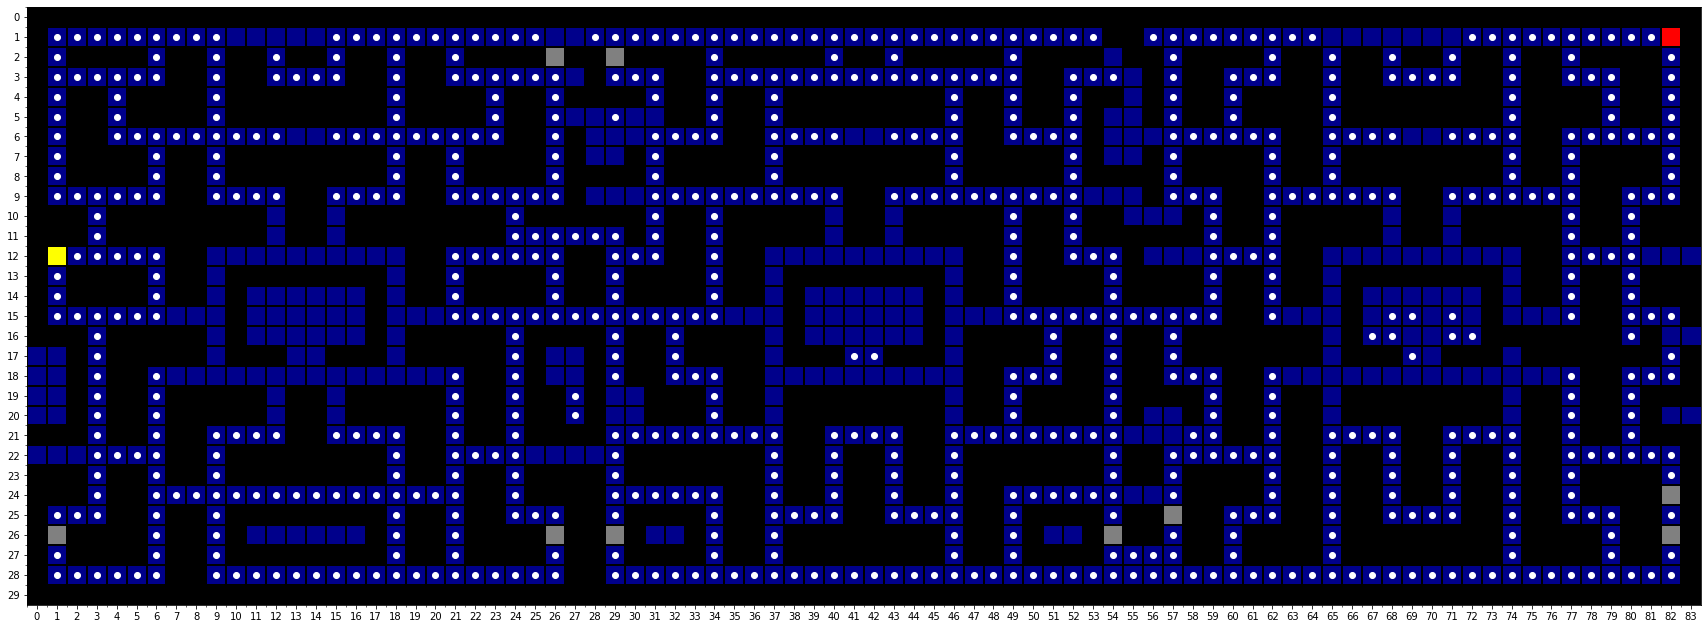

In [20]:
make_grid_plot(maze, initial_position, goal_position, mazeName_plot)